In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-05-19 19:41:49.965825: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [40]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [41]:
with open(data_dir + 'collocated_dict_ascat_9000_images.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [42]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,-18.566280,-18.004992,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,-18.566280,-18.004992,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-15.381634,-17.913292,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-15.381634,-17.913292,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,-10.832646,-15.996907,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-18.908571,-21.115072,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-13.120513,-17.850687,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z


In [43]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,-18.566280,-18.004992,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,-18.566280,-18.004992,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-15.381634,-17.913292,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-15.381634,-17.913292,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,-10.832646,-15.996907,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-18.908571,-21.115072,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-13.120513,-17.850687,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z


In [44]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time
8291,-0.012150,-0.032903,266.100000,2491.995719,1031.113303,1032.385986,4.375262,4.390499,93.076403,93.066660,...,-20.314684,-20.953699,53.500000,99.329994,145.099991,52.219997,41.040001,52.239998,20210402T110300Z,20210402T124458.125000Z
3812,0.009946,-0.040725,325.699998,2486.762542,1002.355768,1003.579007,5.421004,5.432089,90.952000,90.829780,...,-13.976841,-16.550650,105.349998,60.669998,15.929999,51.360001,40.430000,51.329998,20170612T204500Z,20170612T222658.125000Z
2220,-0.098607,-0.048255,292.959996,2465.628629,1012.968245,1014.174503,5.485714,5.685436,62.488897,60.825029,...,-10.180238,-18.316372,56.160000,101.400002,146.589996,37.619999,28.219999,37.610001,20171118T141200Z,20171118T155058.125000Z
4495,0.547509,0.022966,337.584998,2482.259844,993.137445,994.339005,6.040936,6.061799,86.591240,86.278805,...,-14.060665,-14.675045,73.409996,117.959999,162.399994,59.059998,47.939999,58.859997,20160129T130900Z,20160129T144758.125000Z
1173,0.085739,0.094400,357.980002,2471.653475,1017.458491,1018.669986,8.439131,8.454612,95.247900,95.275105,...,-16.368279,-17.564482,54.480000,100.189995,145.770004,48.719997,37.790001,48.719997,20160916T174500Z,20160916T192358.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,272.535001,2491.064483,1016.776770,1018.032996,3.411718,3.462474,73.038053,72.278851,...,-23.478655,-28.449240,49.070000,95.549995,141.940002,63.939999,52.369999,63.719997,20210118T120300Z,20210118T134158.125000Z
9509,0.065996,-0.026629,273.849998,2476.814342,1011.035600,1012.250504,6.481914,6.540536,83.244302,82.543787,...,-14.892164,-18.181908,55.559998,101.309998,146.940002,46.489998,35.770000,46.469997,20190816T122700Z,20190816T140858.125000Z
2283,0.016743,-0.032014,288.435002,2467.407841,1014.254360,1015.478500,3.801912,4.031039,56.148297,53.812369,...,-16.476969,-19.476072,-24.299999,-69.070000,-113.919998,61.529999,50.469997,61.609997,20171207T151500Z,20171207T165358.125000Z
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z


In [45]:
c = df['stress']
obs = - df['UWr'] * df['rhoair']

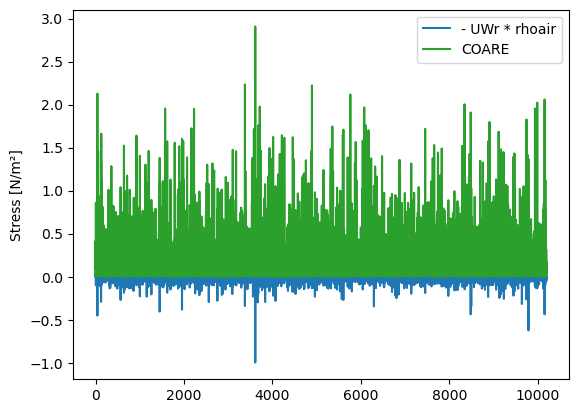

In [46]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

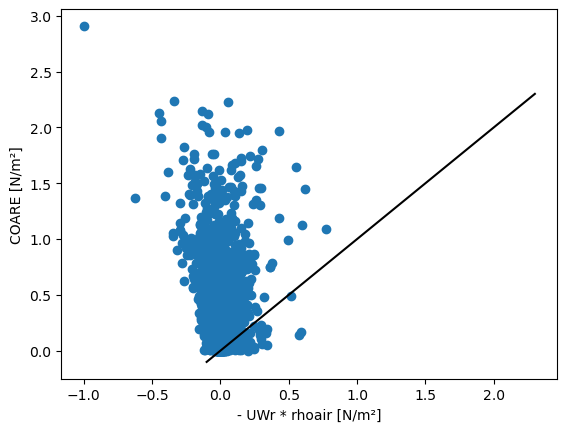

In [47]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [48]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [49]:
df.shape

(10200, 65)

In [50]:
df.shape[0]*0.8

8160.0

In [51]:
split_idx = 8160

In [52]:
df['residuals'] = (- df['UWr'] * df['rhoair']) - df['stress']
e = df['residuals']

Text(0, 0.5, 'Residuals')

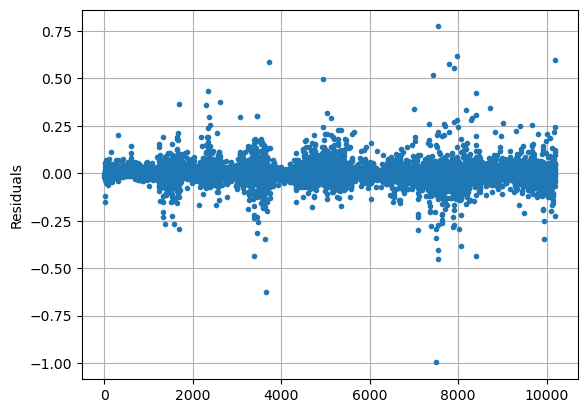

In [53]:
plt.plot(e, '.')
plt.grid()
plt.ylabel('Residuals')

# Prepare features and labels

In [54]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft'
]

In [55]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft
8291,-21.329966,-20.314684,-20.953699,53.500000,99.329994,145.099991,52.219997,41.040001,52.239998
3812,-20.943676,-13.976841,-16.550650,105.349998,60.669998,15.929999,51.360001,40.430000,51.329998
2220,-13.540611,-10.180238,-18.316372,56.160000,101.400002,146.589996,37.619999,28.219999,37.610001
4495,-20.408886,-14.060665,-14.675045,73.409996,117.959999,162.399994,59.059998,47.939999,58.859997
1173,-18.629818,-16.368279,-17.564482,54.480000,100.189995,145.770004,48.719997,37.790001,48.719997
...,...,...,...,...,...,...,...,...,...
7832,-27.140862,-23.478655,-28.449240,49.070000,95.549995,141.940002,63.939999,52.369999,63.719997
9509,-22.741312,-14.892164,-18.181908,55.559998,101.309998,146.940002,46.489998,35.770000,46.469997
2283,-22.848459,-16.476969,-19.476072,-24.299999,-69.070000,-113.919998,61.529999,50.469997,61.609997
10196,-20.899197,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997


In [56]:
y = e

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [57]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [58]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [59]:
c_train = c[:split_idx]
c_test = c[split_idx:]

In [60]:
obs_train = obs[:split_idx]
obs_test = obs[split_idx:]

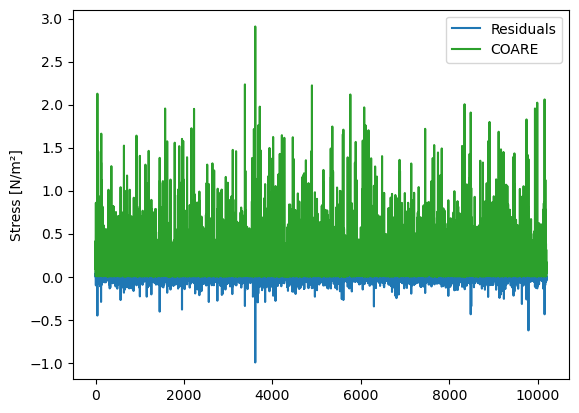

In [61]:

plt.plot(y.values, label='Residuals')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [62]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [63]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [64]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 0s 1ms/step - loss: 2978.5042 - mean_absolute_error: 42.4784 - val_loss: 419.9781 - val_mean_absolute_error: 16.3897
Epoch 2/500
179/179 [==============================] - 0s 600us/step - loss: 1313.4035 - mean_absolute_error: 13.5230 - val_loss: 89.9841 - val_mean_absolute_error: 7.8384
Epoch 3/500
179/179 [==============================] - 0s 632us/step - loss: 630.2219 - mean_absolute_error: 7.7905 - val_loss: 57.3872 - val_mean_absolute_error: 6.1090
Epoch 4/500
179/179 [==============================] - 0s 582us/step - loss: 735.1390 - mean_absolute_error: 6.5301 - val_loss: 42.5711 - val_mean_absolute_error: 5.1937
Epoch 5/500
179/179 [==============================] - 0s 584us/step - loss: 357.3924 - mean_absolute_error: 5.4216 - val_loss: 34.8647 - val_mean_absolute_error: 4.6869
Epoch 6/500
179/179 [==============================] - 0s 595us/step - loss: 687.5206 - mean_absolute_error: 5.3524 - val_loss: 30.0172 - val_mean

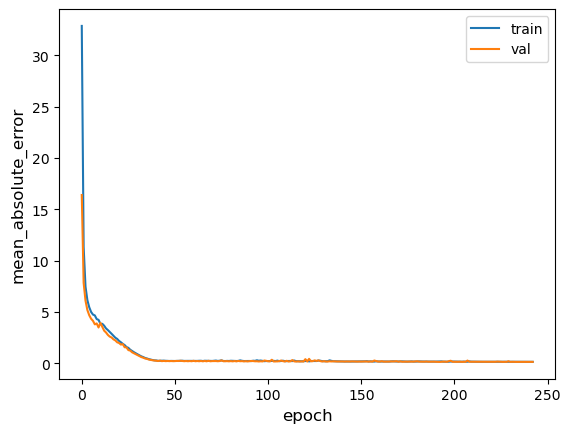

64/64 [==============================] - 0s 298us/step - loss: 0.0321 - mean_absolute_error: 0.1479
Test accuracy 0.14792174100875854
Test loss 0.03206680342555046


In [65]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [66]:
y_test_pred = multi_dense_model.predict(x_test)

In [67]:
np.mean(y_test)

-0.0018541343979944635

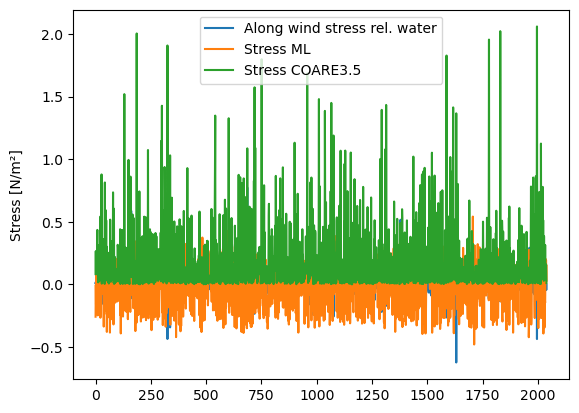

In [68]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

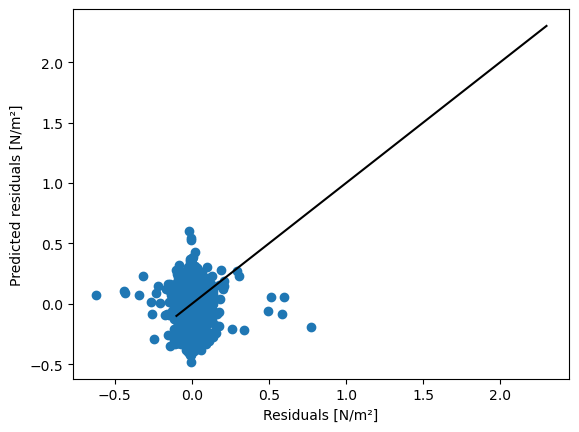

In [69]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

In [70]:
obs_test.values.shape

(2040,)

In [74]:
y_test_pred[:, 0].shape

(2040,)

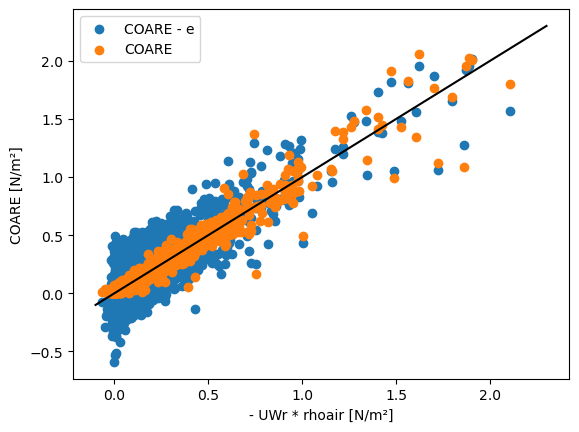

In [89]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [90]:
rmse(y_test.values, y_test_pred)

0.177453816265656

In [94]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.1756654219091884

In [95]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [96]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.03053461],
       [-0.03053461,  1.        ]])

In [98]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.82312098],
       [0.82312098, 1.        ]])

In [99]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

# Other experiments

In [100]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [101]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [102]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 3.0860 - mean_absolute_error: 1.4310 - val_loss: 0.1467 - val_mean_absolute_error: 0.3175
Epoch 2/500
179/179 [==============================] - 0s 740us/step - loss: 0.0965 - mean_absolute_error: 0.2349 - val_loss: 0.1041 - val_mean_absolute_error: 0.2649
Epoch 3/500
179/179 [==============================] - 0s 744us/step - loss: 0.0476 - mean_absolute_error: 0.1671 - val_loss: 0.1319 - val_mean_absolute_error: 0.2637
Epoch 4/500
179/179 [==============================] - 0s 713us/step - loss: 0.0294 - mean_absolute_error: 0.1232 - val_loss: 0.1432 - val_mean_absolute_error: 0.2769
Epoch 5/500
179/179 [==============================] - 0s 733us/step - loss: 0.0221 - mean_absolute_error: 0.0948 - val_loss: 0.1273 - val_mean_absolute_error: 0.2608
Epoch 6/500
179/179 [==============================] - 0s 737us/step - loss: 0.0176 - mean_absolute_error: 0.0759 - val_loss: 0.1350 - val_mean_absolute_error: 0.2714


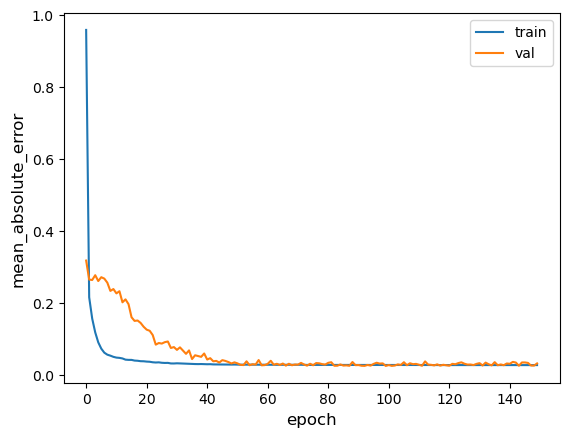

64/64 [==============================] - 0s 363us/step - loss: 0.0050 - mean_absolute_error: 0.0358
Test accuracy 0.03580642119050026
Test loss 0.004986201878637075


In [103]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [104]:
y_test_pred = multi_dense_model.predict(x_test)

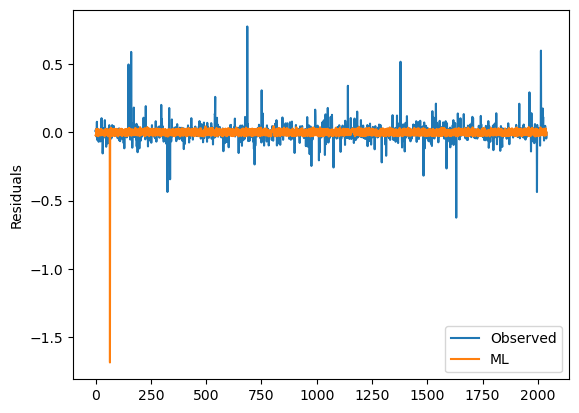

In [116]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

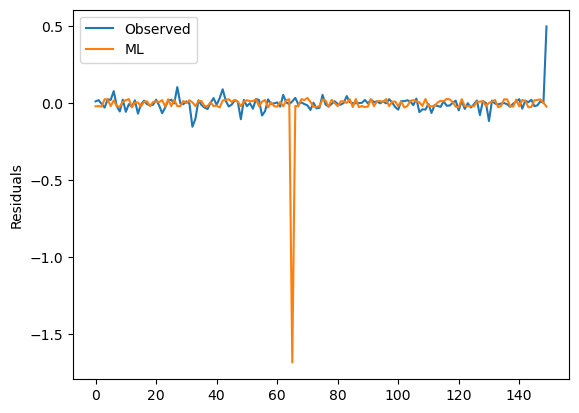

In [117]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

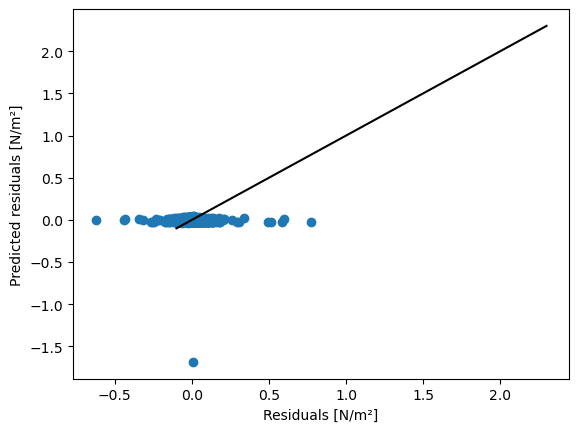

In [118]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

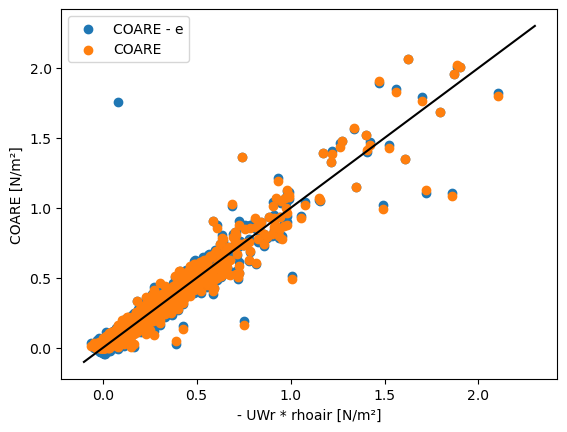

In [119]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [120]:
rmse(y_test.values, y_test_pred)

0.07033261578975983

In [121]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.0700756186688416

In [122]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [123]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.00832151],
       [-0.00832151,  1.        ]])

In [124]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.96047241],
       [0.96047241, 1.        ]])

In [125]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [126]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [127]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [128]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.0696 - mean_absolute_error: 0.7881 - val_loss: 0.1298 - val_mean_absolute_error: 0.3194
Epoch 2/500
179/179 [==============================] - 0s 902us/step - loss: 0.4824 - mean_absolute_error: 0.5037 - val_loss: 0.0356 - val_mean_absolute_error: 0.1535
Epoch 3/500
179/179 [==============================] - 0s 855us/step - loss: 0.3147 - mean_absolute_error: 0.4017 - val_loss: 0.0212 - val_mean_absolute_error: 0.1164
Epoch 4/500
179/179 [==============================] - 0s 833us/step - loss: 0.2056 - mean_absolute_error: 0.3301 - val_loss: 0.0133 - val_mean_absolute_error: 0.0895
Epoch 5/500
179/179 [==============================] - 0s 818us/step - loss: 0.1556 - mean_absolute_error: 0.2682 - val_loss: 0.0073 - val_mean_absolute_error: 0.0653
Epoch 6/500
179/179 [==============================] - 0s 822us/step - loss: 0.1188 - mean_absolute_error: 0.2419 - val_loss: 0.0057 - val_mean_absolute_error: 0.0563


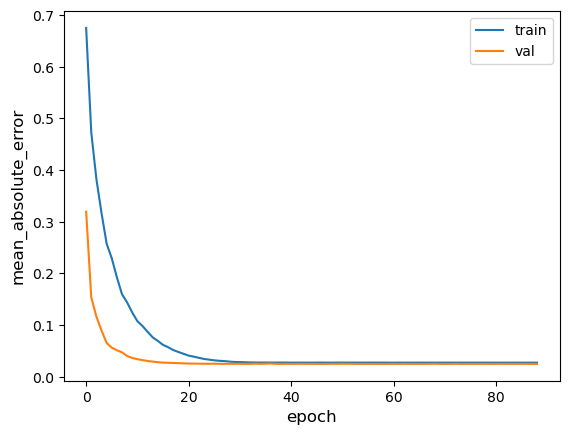

64/64 [==============================] - 0s 364us/step - loss: 0.0032 - mean_absolute_error: 0.0279
Test accuracy 0.027859952300786972
Test loss 0.0031583630479872227


In [129]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [131]:
y_test_pred = multi_dense_model.predict(x_test)

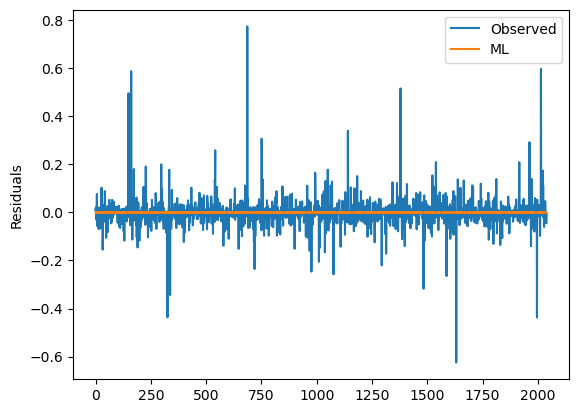

In [132]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

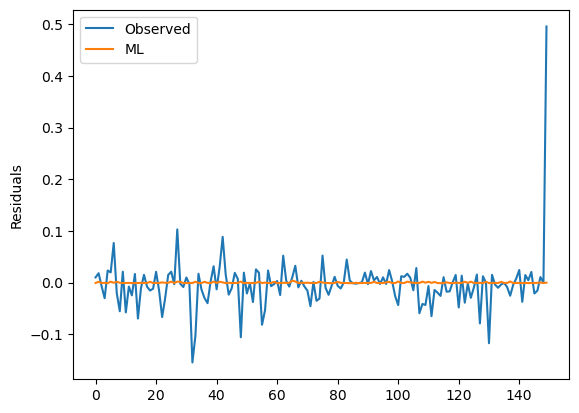

In [133]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

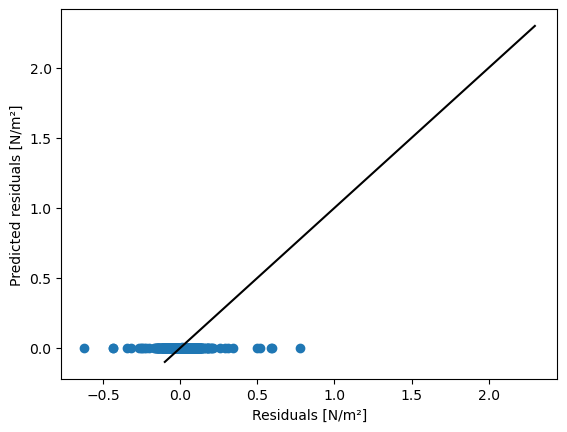

In [134]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

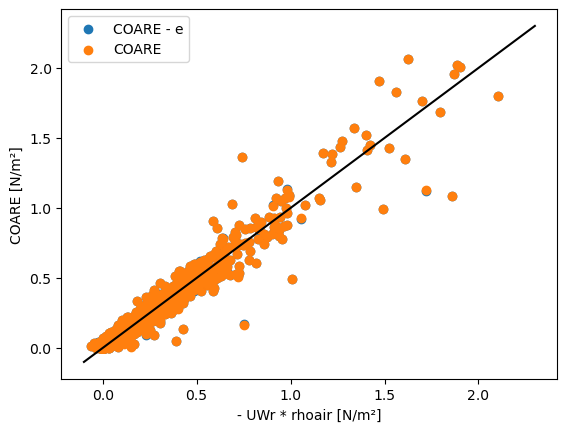

In [135]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [136]:
rmse(y_test.values, y_test_pred)

0.05624303061501977

In [137]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.05630055408756107

In [138]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [139]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.04613211],
       [0.04613211, 1.        ]])

In [140]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.       , 0.9738076],
       [0.9738076, 1.       ]])

In [141]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [142]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [143]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [144]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 0.4134 - mean_absolute_error: 0.4890 - val_loss: 0.0773 - val_mean_absolute_error: 0.2143
Epoch 2/500
179/179 [==============================] - 0s 714us/step - loss: 0.1631 - mean_absolute_error: 0.3073 - val_loss: 0.0123 - val_mean_absolute_error: 0.0807
Epoch 3/500
179/179 [==============================] - 0s 748us/step - loss: 0.0825 - mean_absolute_error: 0.2183 - val_loss: 0.0057 - val_mean_absolute_error: 0.0572
Epoch 4/500
179/179 [==============================] - 0s 812us/step - loss: 0.0405 - mean_absolute_error: 0.1517 - val_loss: 0.0036 - val_mean_absolute_error: 0.0431
Epoch 5/500
179/179 [==============================] - 0s 838us/step - loss: 0.0209 - mean_absolute_error: 0.1091 - val_loss: 0.0029 - val_mean_absolute_error: 0.0369
Epoch 6/500
179/179 [==============================] - 0s 804us/step - loss: 0.0112 - mean_absolute_error: 0.0787 - val_loss: 0.0024 - val_mean_absolute_error: 0.0322


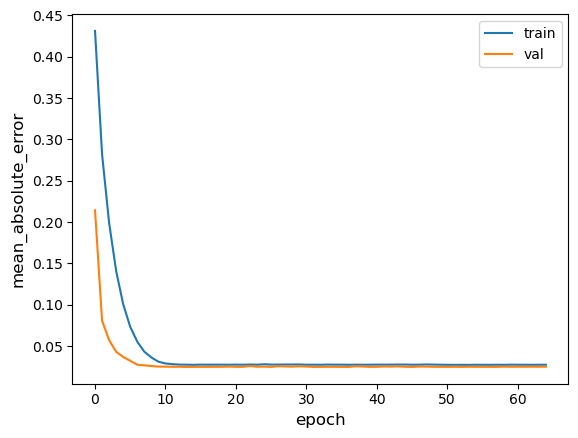

64/64 [==============================] - 0s 318us/step - loss: 0.0032 - mean_absolute_error: 0.0283
Test accuracy 0.02825804613530636
Test loss 0.003168512135744095


In [145]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [146]:
y_test_pred = multi_dense_model.predict(x_test)

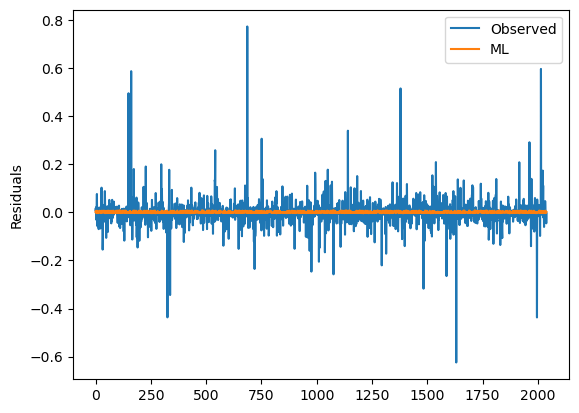

In [147]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

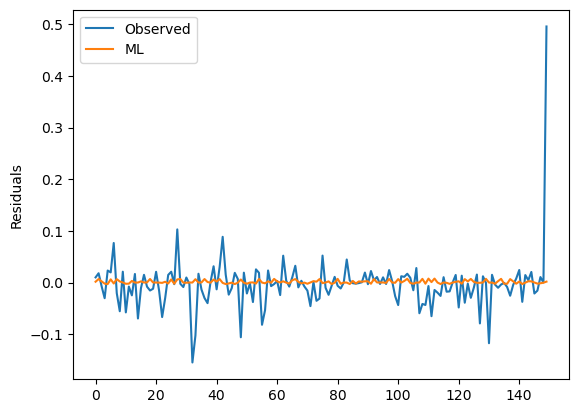

In [149]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

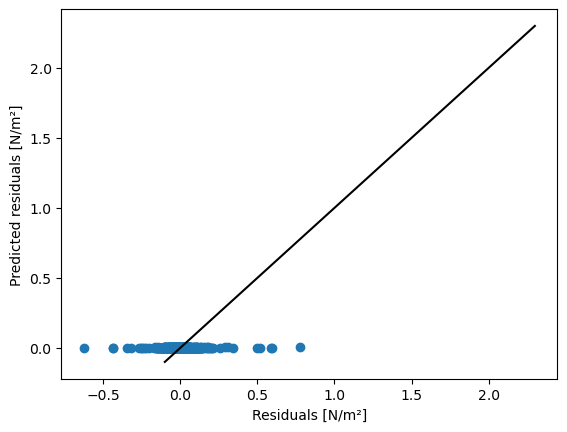

In [150]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

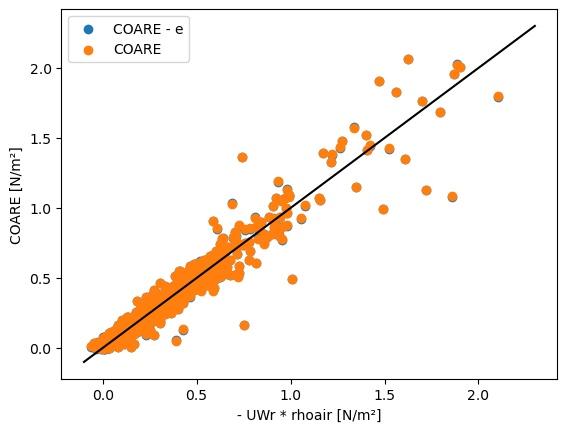

In [151]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [152]:
rmse(y_test.values, y_test_pred)

0.05636850827546058

In [153]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.056376267253080974

In [154]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [155]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.02621633],
       [0.02621633, 1.        ]])

In [156]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97372269],
       [0.97372269, 1.        ]])

In [157]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [168]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [169]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [170]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 12ms/step - loss: 3.0252 - mean_absolute_error: 1.0033 - val_loss: 0.1128 - val_mean_absolute_error: 0.2397
Epoch 2/500
179/179 [==============================] - 2s 12ms/step - loss: 0.4071 - mean_absolute_error: 0.4932 - val_loss: 0.0449 - val_mean_absolute_error: 0.1795
Epoch 3/500
179/179 [==============================] - 2s 12ms/step - loss: 0.2692 - mean_absolute_error: 0.4108 - val_loss: 0.0113 - val_mean_absolute_error: 0.0887
Epoch 4/500
179/179 [==============================] - 2s 12ms/step - loss: 0.1975 - mean_absolute_error: 0.3485 - val_loss: 0.0090 - val_mean_absolute_error: 0.0598
Epoch 5/500
179/179 [==============================] - 2s 12ms/step - loss: 0.1219 - mean_absolute_error: 0.2744 - val_loss: 0.0128 - val_mean_absolute_error: 0.0973
Epoch 6/500
179/179 [==============================] - 2s 11ms/step - loss: 0.0783 - mean_absolute_error: 0.2198 - val_loss: 0.0049 - val_mean_absolute_error: 0.0574
Epoc

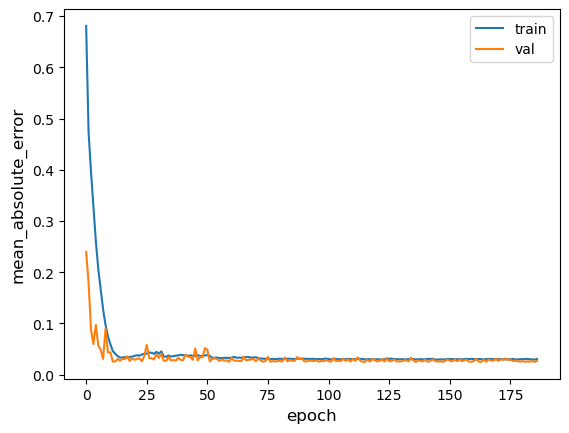

64/64 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_absolute_error: 0.0298
Test accuracy 0.02984284609556198
Test loss 0.0032358672469854355


In [171]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [172]:
y_test_pred = multi_dense_model.predict(x_test)

In [173]:
rmse(y_test.values, y_test_pred)

0.05715406713639788

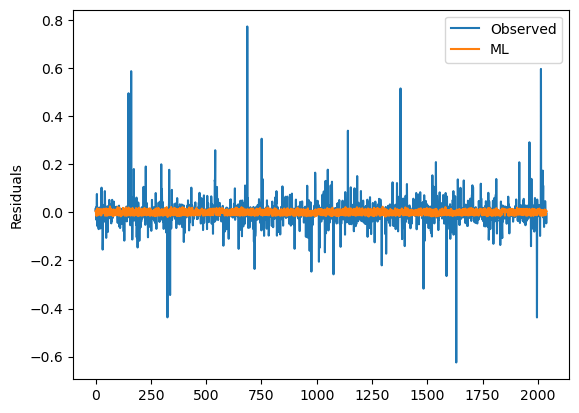

In [175]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

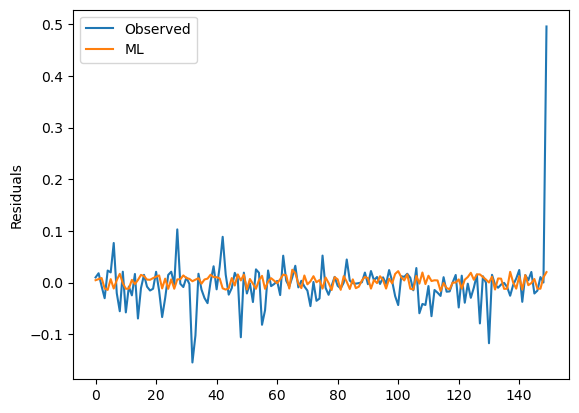

In [185]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

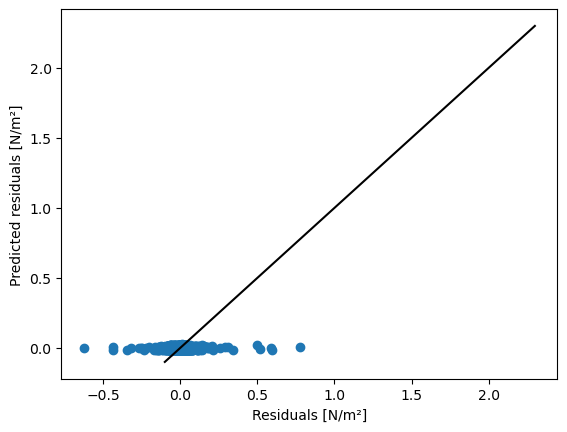

In [186]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

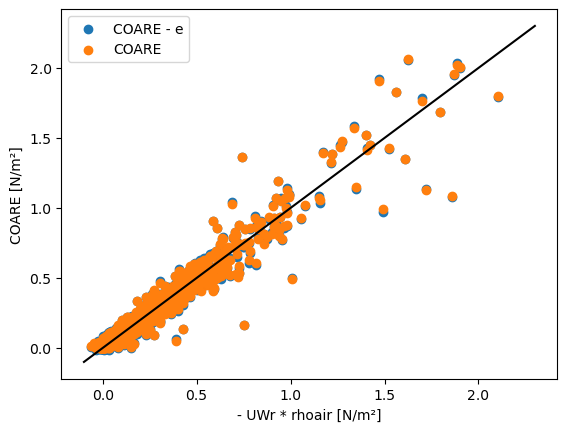

In [187]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [188]:
rmse(y_test.values, y_test_pred)

0.05715406713639788

In [189]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.057341336899468645

In [190]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [191]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.02770669],
       [0.02770669, 1.        ]])

In [192]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97290369],
       [0.97290369, 1.        ]])

In [193]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [194]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [195]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [196]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 136ms/step - loss: 25.5223 - mean_absolute_error: 3.1619 - val_loss: 135.4255 - val_mean_absolute_error: 11.4332
Epoch 2/500
6/6 [==============================] - 1s 104ms/step - loss: 1.3070 - mean_absolute_error: 0.8887 - val_loss: 463.2174 - val_mean_absolute_error: 18.5989
Epoch 3/500
6/6 [==============================] - 1s 104ms/step - loss: 1.0214 - mean_absolute_error: 0.7621 - val_loss: 478.4828 - val_mean_absolute_error: 18.3731
Epoch 4/500
6/6 [==============================] - 1s 108ms/step - loss: 0.8178 - mean_absolute_error: 0.6965 - val_loss: 57.6647 - val_mean_absolute_error: 5.4838
Epoch 5/500
6/6 [==============================] - 1s 105ms/step - loss: 0.7728 - mean_absolute_error: 0.6837 - val_loss: 232.2560 - val_mean_absolute_error: 13.1161
Epoch 6/500
6/6 [==============================] - 1s 111ms/step - loss: 0.9647 - mean_absolute_error: 0.6486 - val_loss: 18.8758 - val_mean_absolute_error: 3.2548
Epoch 7

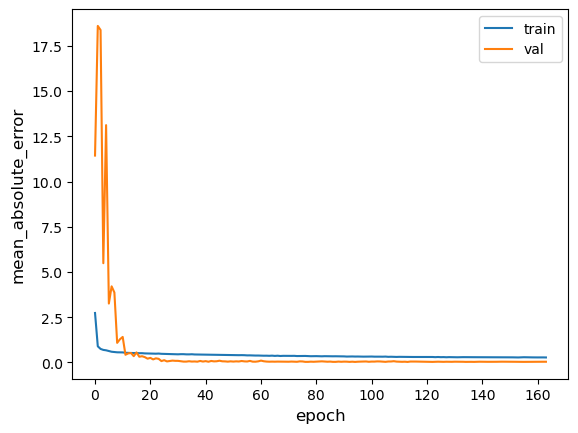

64/64 [==============================] - 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0422
Test accuracy 0.04217376187443733
Test loss 0.0042321705259382725


In [197]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [198]:
y_test_pred = multi_dense_model.predict(x_test)

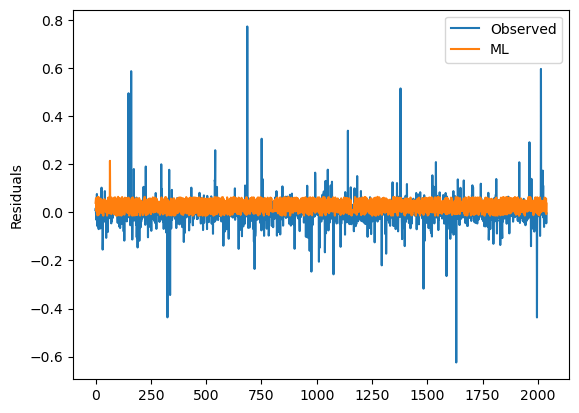

In [199]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

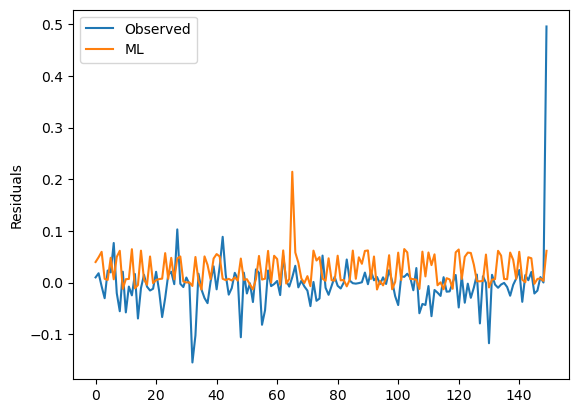

In [200]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

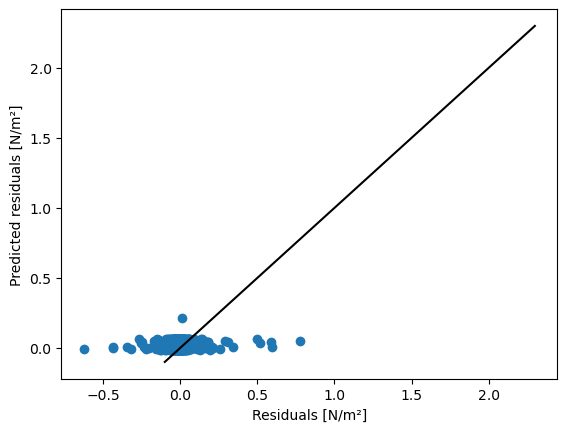

In [201]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

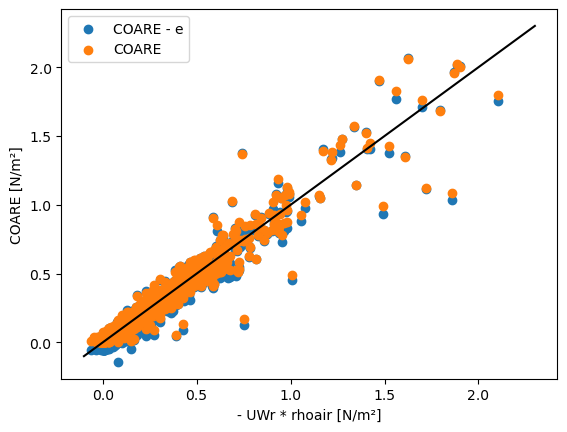

In [202]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [203]:
rmse(y_test.values, y_test_pred)

0.06617642914934033

In [210]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.06603375611539315

In [205]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [206]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.05205873],
       [0.05205873, 1.        ]])

In [207]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.96771958],
       [0.96771958, 1.        ]])

In [208]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])